In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.testing import assert_allclose


In [12]:
def load_binance_response():
    file_path = "./binanceResponse.json"
    with open(file_path, "r") as f:
        return json.load(f)

In [13]:
df  = pd.DataFrame(load_binance_response(), columns=[
    "timestamp", "open", "high", "low", "close", "volume", "close_time",
    "quote_asset_volume", "number_of_trades", "taker_buy_base",
    "taker_buy_quote", "ignore"
])

In [14]:
df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms')

In [15]:
len(df)

500

In [16]:
df.head(300).to_csv("binanceDataSubset.csv", index=False)


In [17]:

# Load the data
data = pd.read_csv('binanceDataSubset.csv')

# Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])


In [18]:
len(data)

300

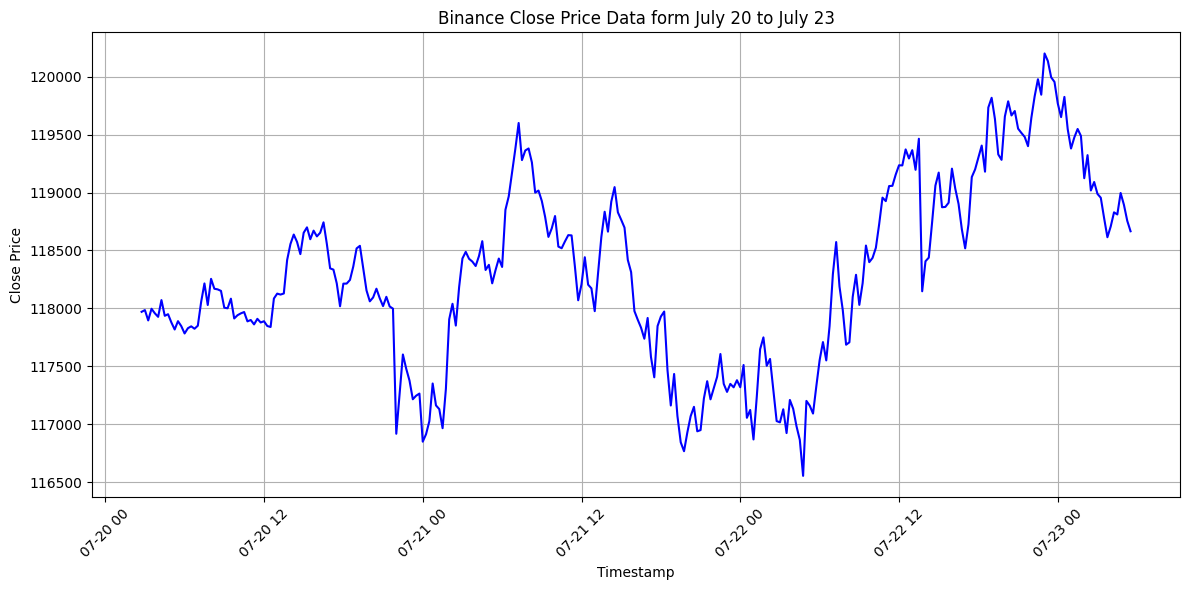

In [19]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(data['timestamp'], data['close'], label='Close Price', color='blue')
plt.title('Binance Close Price Data form July 20 to July 23')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Import Ranging Market Data from Monday 28 july 00:00 to Friday 01 August 16:00 GMT+3

In [175]:
# Load the data
df = pd.read_csv('./SmartDataExport - SmartDataExport.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%Y.%m.%d %H:%M')
# Select a time range (example: between 2025-07-15 10:00 and 2025-07-15 12:00)
start_time = pd.to_datetime('2025-07-28 00:00')
end_time = pd.to_datetime('2025-08-01 16:00')

# Method 1: Using boolean indexing
accumulating_market_profile = df[(df['Timestamp'] >= start_time) & (df['Timestamp'] <= end_time)]

# Method 2: Using between()
# accumulating_market_profile = accumulating_market_profile[accumulating_market_profile['Timestamp'].between(start_time, end_time)]

accumulating_market_profile.to_csv('accumulating_market_profile.csv', index=False)
accumulating_market_profile.head(100)


,Timestamp,Open,High,Low,Close,Spread (Pips),RSI(14),"MA(20,SMA)",MACD Main,MACD Signal,ATR(14),ADX(14),plusDI(14),minusDI(14),StochK(14),StochD(14),BB_Upper,BB_Mid,BB_Lower
544,2025-07-28 00:00:00,118723.641,118828.539,118700.766,118701.125,52422,76.726232,116527.6618,419.937176,244.928738,396.443357,58.714420,37.262342,3.913713,92.547992,86.080269,117763.2379,116527.6618,115292.0857
545,2025-07-28 00:15:00,118702.383,119016.734,118674.641,118988.141,56421,78.257138,116690.2771,550.667871,287.389403,407.186643,62.116694,39.629072,3.391884,93.935914,90.576005,118273.3966,116690.2770,115107.1575
546,2025-07-28 00:30:00,118979.141,119063.234,118904.508,119063.234,56421,78.652778,116850.4919,652.807111,339.527653,390.960071,65.264707,38.251298,2.939633,98.206234,94.896713,118692.1086,116850.4919,115008.8751
547,2025-07-28 00:45:00,119050.680,119239.734,119030.367,119229.141,56421,79.538646,117006.1716,738.626082,396.841369,392.943929,68.448709,44.391355,2.547682,99.555886,97.232678,119084.1930,117006.1716,114928.1501
548,2025-07-28 01:00:00,119229.141,119718.734,119174.250,119666.641,56421,81.695777,117178.2267,832.346061,464.126490,418.640357,71.532108,50.202268,2.207991,99.316500,99.026207,119522.0491,117178.2267,114834.4042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639,2025-07-28 23:45:00,117802.141,118036.141,117762.063,117989.539,56421,50.005885,117864.5918,-145.223445,-183.014880,357.335929,23.239774,18.102753,21.780014,43.483037,37.651110,118312.8032,117864.5917,117416.3803
640,2025-07-29 00:00:00,117984.172,118134.734,117894.836,118001.336,54000,50.214407,117862.9617,-121.000928,-169.223756,350.899000,20.904536,21.168771,18.876012,65.041223,46.532325,118308.9292,117862.9617,117416.9941
641,2025-07-29 00:15:00,118001.336,118120.641,117903.203,118043.234,56421,50.996163,117852.2867,-97.301954,-157.053106,350.770643,18.880663,18.346268,16.359210,75.021499,61.181920,118269.3232,117852.2867,117435.2501
642,2025-07-29 00:30:00,118031.641,118297.539,117968.219,118297.039,56421,55.549556,117852.9367,-57.378975,-143.602390,352.422429,19.544127,23.062251,14.177982,84.644043,74.902255,118272.6946,117852.9367,117433.1787


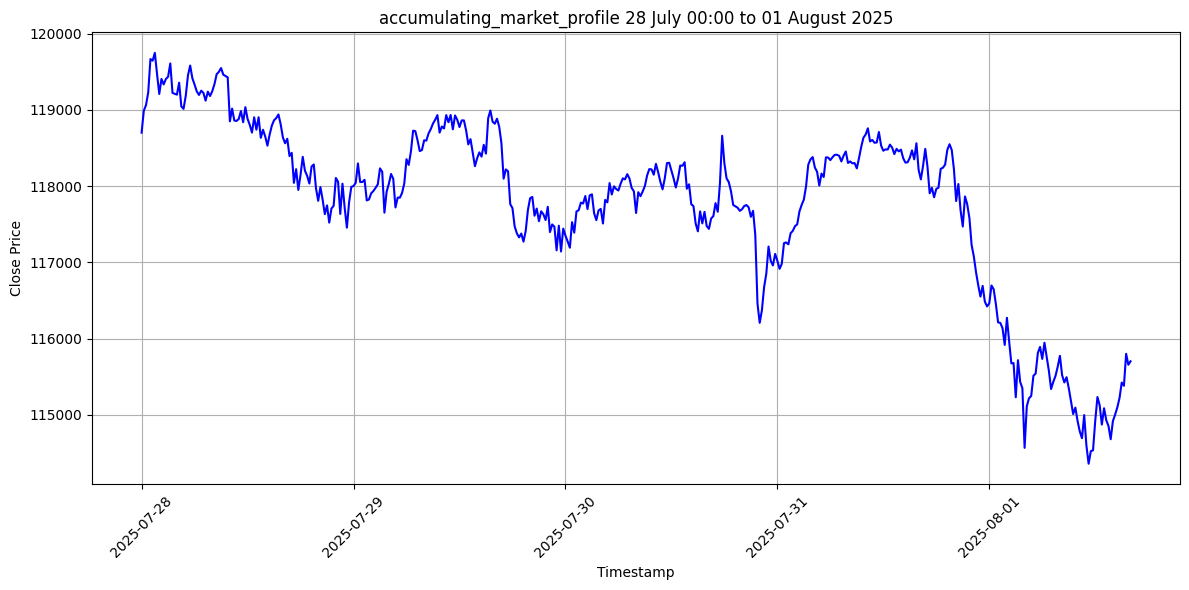

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(accumulating_market_profile['Timestamp'], accumulating_market_profile['Close'], label='Close Price', color='blue')
plt.title('accumulating_market_profile 28 July 00:00 to 01 August 2025')
plt.xlabel('Timestamp')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## test_df_contains_valid_data_after_BillingerBands_is_applied

In [45]:
from ta.volatility import BollingerBands

indicators = accumulating_market_profile

indicator_bb = BollingerBands(close=indicators["Close"], window=20, window_dev=2)


indicators["mavg"] = indicator_bb.bollinger_mavg()

In [46]:
pre_computed_bb_mid = pd.DataFrame()
pre_computed_bb_mid = indicators.loc[:,'BB_Upper':'BB_Lower']
pre_computed_bb_mid.iloc[:19,:] = None
pre_computed_bb_mid["Timestamp"] = indicators['Timestamp']
pre_computed_bb_mid["mavg"] = indicators["mavg"]

# pre_computed_bb_mid.loc[:18, 'BB_Upper':'BB_Lower'] = None

pre_computed_bb_mid["BB_Mid vs mavg"] =  pre_computed_bb_mid.loc[19:,"mavg"] == pre_computed_bb_mid.loc[19:,"BB_Mid"]
pre_computed_bb_mid["isna_value"] =  pre_computed_bb_mid.loc[:19,"mavg"].isna() & pre_computed_bb_mid.loc[:19,"BB_Mid"].isna()
pre_computed_bb_mid.head(50)

assert_allclose(pre_computed_bb_mid['BB_Mid'], pre_computed_bb_mid['mavg'], rtol=0.001)
pre_computed_bb_mid.to_csv('./pre_computed_bb_mid.csv', index=False)

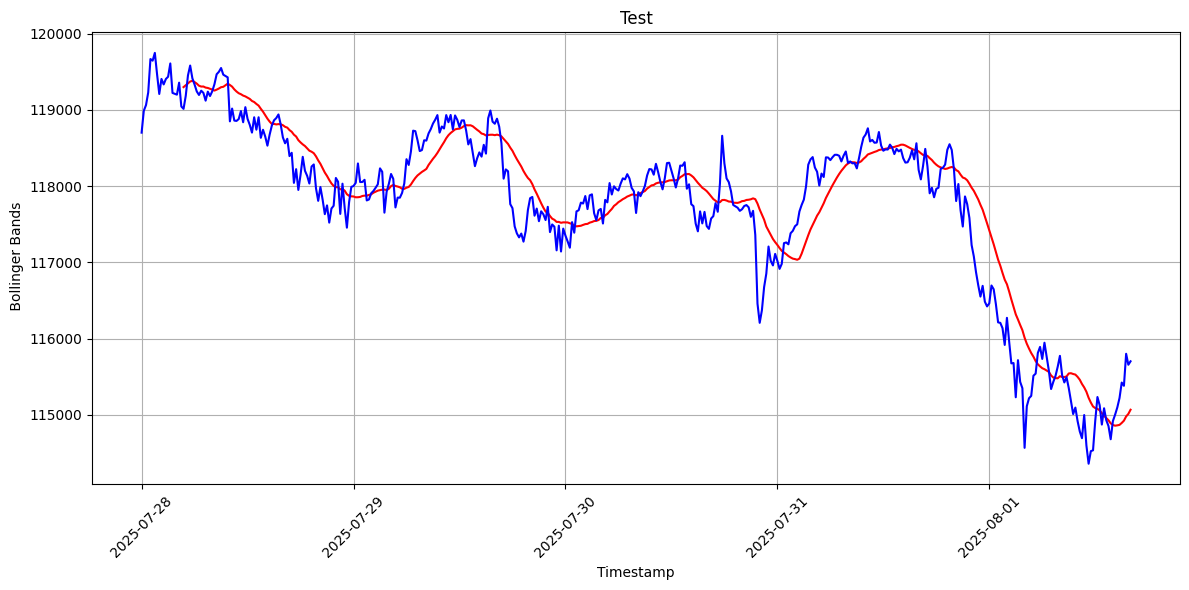

In [53]:
pre_computed_bb_mid['Timestamp'] = pd.to_datetime(pre_computed_bb_mid['Timestamp'])
# Plot
plt.figure(figsize=(12, 6))
plt.plot(pre_computed_bb_mid['Timestamp'], pre_computed_bb_mid['mavg'], label='mavg', color='red')
# plt.plot(pre_computed_bb_mid['Timestamp'], pre_computed_bb_mid['BB_Mid'], label='BB_Mid', color='yellow')
plt.plot(accumulating_market_profile['Timestamp'], accumulating_market_profile['Close'], label='Close Price', color='blue')

plt.title('Test')
plt.xlabel('Timestamp')
plt.ylabel(' Bollinger Bands')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## test_df_contains_valid_data_after_RSI_is_applied

In [50]:
import ta

In [51]:
test_df = pd.DataFrame()  # New empty DataFrame
test_df['RSI(14)'] = indicators['RSI(14)']
test_df["Timestamp"] = indicators['Timestamp']

In [170]:
pre_computed_rsi_14 = pd.DataFrame()
pre_computed_rsi_14['RSI(14)'] = indicators['RSI(14)']
pre_computed_rsi_14['rsi_14'] = ta.momentum.RSIIndicator(close=indicators['Close'], window=14).rsi()

# Replace only RSI values in the first 13 rows
pre_computed_rsi_14.loc[:12, ['RSI(14)', 'rsi_14']] = None

# Now assign Timestamp safely after clearing NaNs
pre_computed_rsi_14["Timestamp"] = indicators['Timestamp']

pre_computed_rsi_14["rsi_14"] = ta.momentum.RSIIndicator(close=indicators['Close'], window=14).rsi()

pre_computed_rsi_14.to_csv('./pre_computed_rsi_14.csv', index=False)

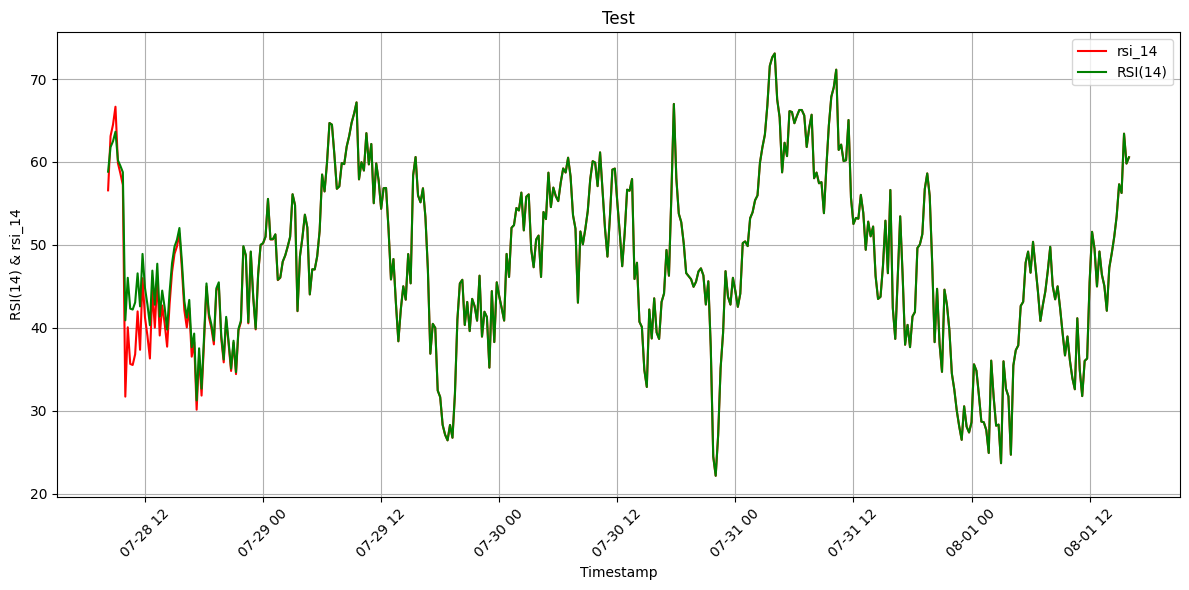

In [176]:
# Drop rows where either RSI column is NaN to ensure equal-length arrays
plot_df = pre_computed_rsi_14.dropna(subset=['rsi_14', 'RSI(14)', 'Timestamp'])

# Plot
plt.figure(figsize=(12, 6))
plt.plot(plot_df['Timestamp'], plot_df['rsi_14'], label='rsi_14', color='red')
plt.plot(plot_df['Timestamp'], plot_df['RSI(14)'], label='RSI(14)', color='green')

plt.title('Test')
plt.xlabel('Timestamp')
plt.ylabel('RSI(14) & rsi_14')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [163]:
# Check the full range of the Timestamp column
print(pre_computed_rsi_14['Timestamp'].min(), pre_computed_rsi_14['Timestamp'].max())


2025-07-28 00:00:00 2025-08-01 16:00:00


In [164]:
# Check if the data is sorted
# If Timestamp is not sorted, the plot may appear incorrect or truncated.
print(df['Timestamp'].is_monotonic_increasing)


True


In [166]:
print(np.isinf(pre_computed_rsi_14[['rsi_14', 'RSI(14)']]).sum())


rsi_14     0
RSI(14)    0
dtype: int64


In [168]:
print(pre_computed_rsi_14['rsi_14'].nunique(), pre_computed_rsi_14['RSI(14)'].nunique())
print(pre_computed_rsi_14['Time'].nunique())

435 435
449


In [169]:
pre_computed_rsi_14.head(50)

,RSI(14),Timestamp,rsi_14
544,NaN,2025-07-28 00:00:00,NaN
545,NaN,2025-07-28 00:15:00,NaN
546,NaN,2025-07-28 00:30:00,NaN
547,NaN,2025-07-28 00:45:00,NaN
548,NaN,2025-07-28 01:00:00,NaN
549,NaN,2025-07-28 01:15:00,NaN
550,NaN,2025-07-28 01:30:00,NaN
551,NaN,2025-07-28 01:45:00,NaN
552,NaN,2025-07-28 02:00:00,NaN
553,NaN,2025-07-28 02:15:00,NaN


## test_df_contains_valid_data_after_MACD_is_applied

In [89]:
import ta


In [160]:
pre_computed_macd = pd.DataFrame()
pre_computed_macd['MACD Main'] = indicators['MACD Main']
pre_computed_macd['MACD Signal'] = indicators['MACD Signal']
pre_computed_macd["Timestamp"] = indicators['Timestamp']

macd = ta.trend.MACD(close=df['Close'], window_slow=26, window_fast=12, window_sign=9)

pre_computed_macd['macd_mavg'] = macd.macd()
pre_computed_macd['macd_signal'] = macd.macd_signal()
pre_computed_macd['macd_diff'] = macd.macd_diff()

pre_computed_macd.loc[:24, 'MACD Main'] = None
# pre_computed_rsi_14["RSI(14) vs rsi_14"] = pre_computed_rsi_14.loc[13:,"rsi_14"] == pre_computed_rsi_14.loc[13:,"RSI(14)"]
# pre_computed_rsi_14["isna_value"] =  pre_computed_rsi_14.loc[:19,"rsi_14"].isna() & pre_computed_rsi_14.loc[:13,"RSI(14)"].isna()
pre_computed_macd.head(10)

MACD_Histogram = pre_computed_macd['MACD Main']-pre_computed_macd['MACD Signal']

pre_computed_macd['MACD_Histogram'] = MACD_Histogram
pre_computed_macd['macd_histo'] = pre_computed_macd['macd_diff']

# assert_allclose(pre_computed_rsi_14['RSI(14)'], pre_computed_rsi_14['rsi_14'], rtol=0.001)
pre_computed_macd.to_csv('./pre_computed_macd.csv', index=False)

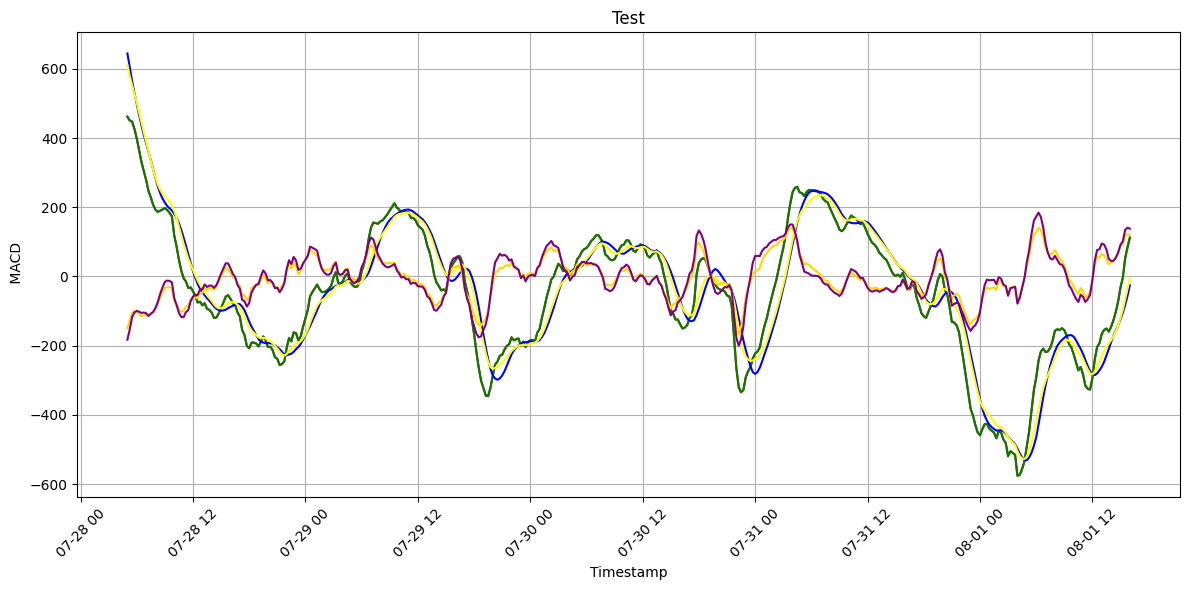

In [161]:
pre_computed_macd['Timestamp'] = pd.to_datetime(pre_computed_macd['Timestamp'])
# Plot
plt.figure(figsize=(12, 6))
# test = pd.DataFrame()
# test = pre_computed_rsi_14['rsi_14']
# plt.plot(pre_computed_rsi_14['Timestamp'], test.iloc[:], label='rsi_14', color='red')
plt.plot(pre_computed_macd['Timestamp'], pre_computed_macd['MACD Main'].iloc[:], label='MACD Main', color='red')
plt.plot(pre_computed_macd['Timestamp'], pre_computed_macd['macd_mavg'], label='macd_mavg', color='green')

plt.plot(pre_computed_macd['Timestamp'], pre_computed_macd['MACD Signal'].iloc[:], label='MACD_Signal', color='blue')
plt.plot(pre_computed_macd['Timestamp'], pre_computed_macd['macd_signal'], label='macd_signal', color='yellow')

plt.plot(pre_computed_macd['Timestamp'], pre_computed_macd['macd_diff'], label='MACD_Signal', color='gold')
plt.plot(pre_computed_macd['Timestamp'], pre_computed_macd['MACD Main']-pre_computed_macd['MACD Signal'], label='MACD Histogram', color='purple')

plt.title('Test')
plt.xlabel('Timestamp')
plt.ylabel(' MACD')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [144]:
import numpy as np

# Calculate correlation (should be ~ -1 if inverted)
correlation = np.corrcoef(
    pre_computed_macd['MACD Main'].head(400).dropna(),
    pre_computed_macd['macd_mavg'].head(400).dropna()
)[0, 1]

print(f"Correlation: {correlation:.4f}")  # Likely close to -1

Correlation: 1.0000


In [145]:
# len(pre_computed_macd['macd_mavg'])
len(pre_computed_macd['MACD Main'])

449

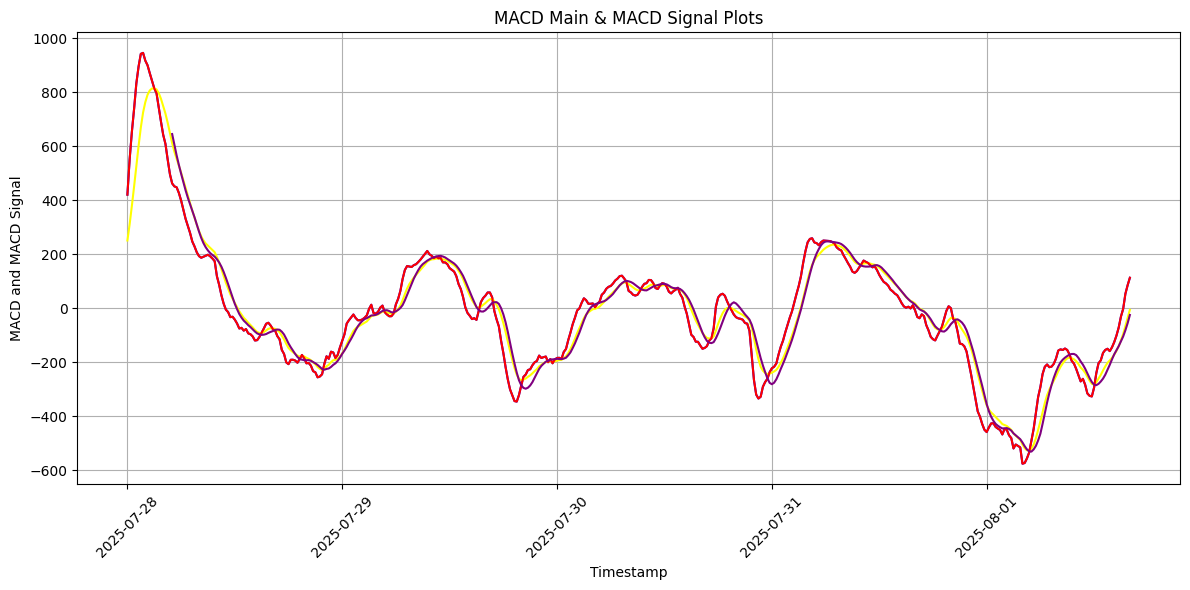

In [157]:
# Convert timestamp to datetime
pre_computed_macd['Timestamp'] = pd.to_datetime(pre_computed_macd['Timestamp'])

pre_computed_macd.dropna()

# Plot
plt.figure(figsize=(12, 6))

plt.plot(pre_computed_macd['Timestamp'], pre_computed_macd['macd_mavg'], label='macd_mavg', color='blue')
plt.plot(pre_computed_macd['Timestamp'], pre_computed_macd['macd_signal'], label='macd_signal', color='yellow')
plt.plot(pre_computed_macd['Timestamp'], pre_computed_macd['MACD Main'], label='MACD Main', color='red')
plt.plot(indicators['Timestamp'], indicators['MACD Signal'], label='MACD Signal', color='purple')

plt.title('MACD Main & MACD Signal Plots')
plt.xlabel('Timestamp')
plt.ylabel('MACD and MACD Signal')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## test_df_contains_valid_data_after_ATR_is_applied